# Comparing datasets

Datasets:
- iDesignRES / OpenEntrance - aggregated (denoted by o_\<something\>)
- pyPSA-Eur - non-aggregated. (denoted by p_\<something\>)

Goals:
- Check the difference of the energy mixes throughout the whole dataset.

Spain:
- What is the energy mix of Spain
- What power generating capacity does Spain have?
- What loads does Spain have?


Questions:
What is the difference between primary and secondary energy?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pypsa

In [2]:
pypsa_data = '../networks/elec_s_8_ec_lcopt_Co2L-24H.nc'

First, we want to **plot the energy mix in OpenEntrance:**

In [3]:
o = pd.read_csv('../networks/OpenEntrance/IAMC_annual_data.csv')

# Select just Region that contains Spain
o_ES = o[o['Region'].str.contains('Spain', case=False, na=False)]

# Show the unique values of the column 'Variable'
print(o_ES['Variable'].unique())

['Network|Electricity|Maximum Flow' 'Capacity|Electricity|Biomass|w/o CCS'
 'Capacity|Electricity|Coal|Hard coal|w/o CCS'
 'Capacity|Electricity|Coal|Lignite|w/o CCS'
 'Capacity|Electricity|Gas|CCGT|w/ CCS'
 'Capacity|Electricity|Gas|CCGT|w/o CCS'
 'Capacity|Electricity|Gas|OCGT|w/o CCS'
 'Capacity|Electricity|Hydro|Pumped Storage'
 'Capacity|Electricity|Hydro|Reservoir'
 'Capacity|Electricity|Hydro|Run of River' 'Capacity|Electricity|Nuclear'
 'Capacity|Electricity|Oil|w/o CCS' 'Capacity|Electricity|Solar|PV'
 'Capacity|Electricity|Wind|Onshore'
 'Capital Cost|Electricity|Biomass|w/ CCS'
 'Capital Cost|Electricity|Biomass|w/o CCS'
 'Capital Cost|Electricity|Coal|Hard coal|w/ CCS'
 'Capital Cost|Electricity|Coal|Hard coal|w/o CCS'
 'Capital Cost|Electricity|Coal|Lignite|w/o CCS'
 'Capital Cost|Electricity|Gas|CCGT|w/ CCS'
 'Capital Cost|Electricity|Gas|CCGT|w/o CCS'
 'Capital Cost|Electricity|Gas|OCGT|w/o CCS'
 'Capital Cost|Electricity|Geothermal'
 'Capital Cost|Electricity|Hydrogen|O

In [4]:

o_ES[o_ES['Variable'] == 'Network|Electricity|Maximum Flow']

,Model,Scenario,Region,Variable,Unit,2030
111,GENeSYS-MOD 3.1,Techno-Friendly 2.0,France>Spain,Network|Electricity|Maximum Flow,MW,5000.0
217,GENeSYS-MOD 3.1,Techno-Friendly 2.0,Portugal>Spain,Network|Electricity|Maximum Flow,MW,4500.0
297,GENeSYS-MOD 3.1,Techno-Friendly 2.0,Spain>France,Network|Electricity|Maximum Flow,MW,5000.0
298,GENeSYS-MOD 3.1,Techno-Friendly 2.0,Spain>Portugal,Network|Electricity|Maximum Flow,MW,4100.0


In [5]:
# Select just the rows that contain 'Capacity|Electricity' in the column 'Variable'
o_ES_Cap_El = o_ES[o_ES['Variable'].str.contains('Capacity\|Electricity', case=False, na=False)].copy()

# Remove Capacity|Electricity from the column 'Variable'
o_ES_Cap_El['Variable'] = o_ES_Cap_El['Variable'].str.replace('Capacity|Electricity|', '')
o_ES_Cap_El

# Drop First Three columns
o_ES_Cap_El = o_ES_Cap_El.drop(['Model', 'Scenario', 'Region'], axis=1)
o_ES_Cap_El.head()

,Variable,Unit,2030
227,Biomass|w/o CCS,MW,1747.280606
228,Coal|Hard coal|w/o CCS,MW,3946.899889
229,Coal|Lignite|w/o CCS,MW,360.000000
230,Gas|CCGT|w/ CCS,MW,448.838921
231,Gas|CCGT|w/o CCS,MW,21434.738832


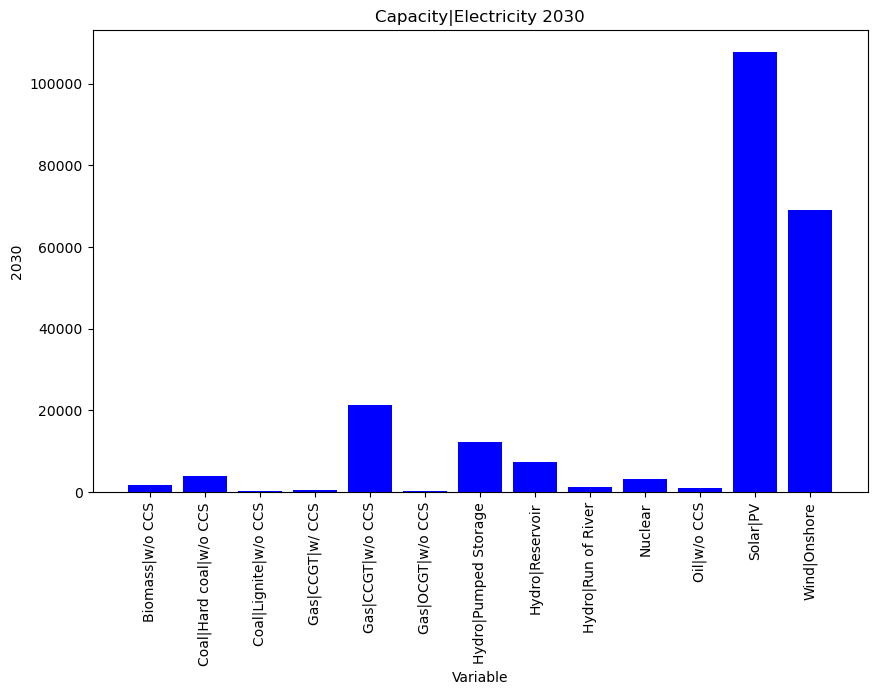

In [6]:
# Plot the 2030 Column in a stacked bar chart. X axis is the 'Variable' column and Y axis is the '2030' column. In matplotlib.
plt.figure(figsize=(10, 6))
plt.bar(o_ES_Cap_El['Variable'], o_ES_Cap_El['2030'], color='blue')
plt.xlabel('Variable')
plt.ylabel('2030')
plt.title('Capacity|Electricity 2030')
plt.xticks(rotation=90)
plt.show()

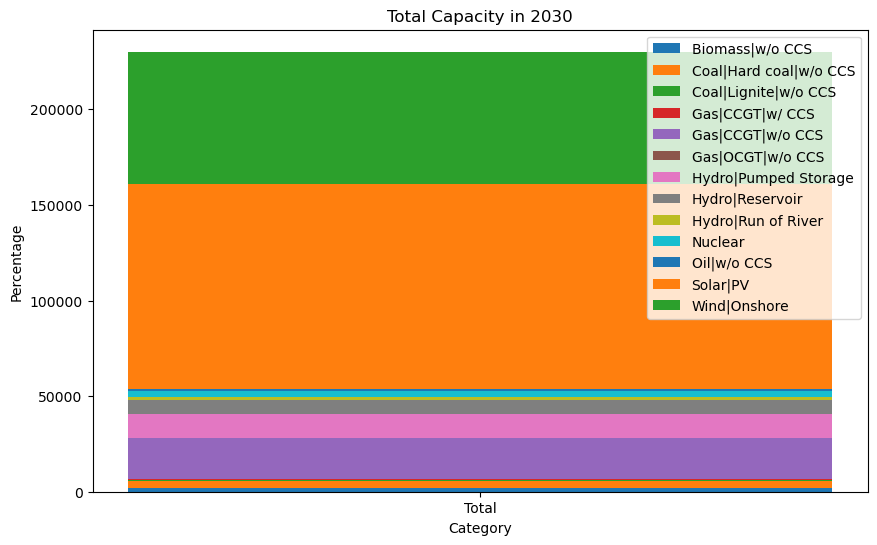

In [7]:
# Initialize the bottom for the first segment of the stacked bar
bottom = 0

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Sort dataframe by Variable column, alphabetically
o_ES_Cap_El = o_ES_Cap_El.sort_values('Variable').copy()

# Plot each segment of the bar
for index, row in o_ES_Cap_El.iterrows():
    plt.bar('Total', row['2030'], bottom=bottom, label=row['Variable'])
    bottom += row['2030']

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Total Capacity in 2030')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [8]:
# TODO: Make bar plot and legend the same order
# TODO: Compare barplot with data from pyPSA-Eur.


In [9]:
# Import the data from pyPSA-Eur
p = pypsa.Network(pypsa_data)

INFO:pypsa.io:Imported network elec_s_8_ec_lcopt_Co2L-24H.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores


In [10]:
# Get the energy capacities from pypsa and aggregate them to the same categories as in the OpenEntrance data
p_ES_Cap_El = p.generators.groupby('carrier')['p_nom'].sum()

In [11]:
# Get the energy capacities from pypsa and aggregate them to the same categories as in the OpenEntrance data
print(p_ES_Cap_El)
print(o_ES_Cap_El)

# Compare the two dataframes - get them into one.

print("pyPSA total cap", p_ES_Cap_El.sum())
print("OpenEntrance total cap", o_ES_Cap_El['2030'].sum())
print("pyPSA only has ", p_ES_Cap_El.sum()/o_ES_Cap_El['2030'].sum()*100, "% of the capacity in OpenEntrance")

carrier
CCGT             23432.532000
coal              4632.297091
nuclear           7117.200000
offwind-ac           0.119997
offwind-dc           0.000000
offwind-float        2.455979
oil                466.971000
onwind           26814.079310
ror                277.008248
solar            10134.984515
solar-hsat           0.000000
Name: p_nom, dtype: float64
                   Variable Unit           2030
227         Biomass|w/o CCS   MW    1747.280606
228  Coal|Hard coal|w/o CCS   MW    3946.899889
229    Coal|Lignite|w/o CCS   MW     360.000000
230         Gas|CCGT|w/ CCS   MW     448.838921
231        Gas|CCGT|w/o CCS   MW   21434.738832
232        Gas|OCGT|w/o CCS   MW     246.000000
233    Hydro|Pumped Storage   MW   12371.794673
234         Hydro|Reservoir   MW    7490.000000
235      Hydro|Run of River   MW    1330.000000
236                 Nuclear   MW    3119.177653
237             Oil|w/o CCS   MW    1007.308828
238                Solar|PV   MW  107656.499004
239       

As we can see, the pyPSA is way less. What year is this data for? And are we taking into account all data?


In [12]:
z_1024 = pypsa.Network('../networks/elec_s_1024.nc')
z_512 = pypsa.Network('../networks/elec_s_512.nc')

INFO:pypsa.io:Imported network elec_s_1024.nc has buses, carriers, generators, lines, links, loads, storage_units
INFO:pypsa.io:Imported network elec_s_512.nc has buses, carriers, generators, lines, links, loads, storage_units


In [13]:
# Get generators with bus that contains 'ES'
print(z_1024.generators[z_1024.generators['bus'].str.contains('ES')].groupby('carrier')['p_nom'].sum())
print(z_512.generators[z_512.generators['bus'].str.contains('ES')].groupby('carrier')['p_nom'].sum())

carrier
CCGT          27349.332000
OCGT             23.000000
biomass          20.000000
coal           4979.097091
nuclear        7117.200000
offwind-ac        3.363219
offwind-dc        0.000000
oil             466.971000
onwind        27083.815248
ror             147.008248
solar         11785.005989
Name: p_nom, dtype: float64
carrier
CCGT          27349.332000
OCGT             23.000000
biomass          20.000000
coal           4979.097091
nuclear        7117.200000
offwind-ac        3.363219
offwind-dc        0.000000
oil             466.971000
onwind        27083.815248
ror             147.008248
solar         11785.005989
Name: p_nom, dtype: float64


So, with the different number of buses, the generator numbers are still the same...

In [14]:
print("First snapshot:", z_1024.snapshots[0])
print("Last snapshot:", z_1024.snapshots[-1])

First snapshot: 2013-01-01 00:00:00
Last snapshot: 2013-12-31 23:00:00


In [15]:
p_ES_Cap_El.index

Index(['CCGT', 'coal', 'nuclear', 'offwind-ac', 'offwind-dc', 'offwind-float',
       'oil', 'onwind', 'ror', 'solar', 'solar-hsat'],
      dtype='object', name='carrier')

In [16]:
oe_to_pypsa_map = {
    "Biomass|w/o CCS": "Biomass",
    "Coal|Hard coal|w/o CCS": "Coal",
    "Coal|Lignite|w/o CCS": "Coal",  # Adding to the same 'coal' category
    "Gas|CCGT|w/o CCS": "Gas",
    "Gas|OCGT|w/o CCS": "Gas",
    "Hydro|Pumped Storage": "Hydro",  # Assuming 'hydro' is a combined category in PyPSA
    "Hydro|Reservoir": "Hydro",  # Assuming 'hydro' is a combined category in PyPSA
    "Hydro|Run of River": "Hydro",
    "Nuclear": "Nuclear",
    "Oil|w/o CCS": "Oil",
    "Solar|PV": "Solar",
    "Wind|Onshore": "Wind"
}

pypsa_simplified_map = {
    "biomass": "Biomass",
    "coal": "Coal",
    "CCGT": "Gas",
    "OCGT": "Gas",
    "hydro": "Hydro",
    "ror": "Hydro",
    "nuclear": "Nuclear",
    "oil": "Oil",
    "solar": "Solar",
    "onwind": "Wind",
    "offwind": "Wind"
}

o_ES_Cap_El['Source'] = o_ES_Cap_El['Variable'].map(oe_to_pypsa_map)
o_ES_Cap_Aggregated = o_ES_Cap_El.groupby('Source')['2030'].sum()

# Turn pyPSA data into a dataframe
p_ES_Cap_El = p_ES_Cap_El.to_frame()

# Get the energy capacities from pypsa and aggregate them to the same categories as in the OpenEntrance data
p_ES_Cap_El['Source'] = p_ES_Cap_El.index.map(pypsa_simplified_map)
p_ES_Cap_Aggregated = p_ES_Cap_El.groupby('Source')['p_nom'].sum()
p_ES_Cap_Aggregated

Source
Coal        4632.297091
Gas        23432.532000
Hydro        277.008248
Nuclear     7117.200000
Oil          466.971000
Solar      10134.984515
Wind       26814.079310
Name: p_nom, dtype: float64

In [17]:
o_ES_Cap_Aggregated

Source
Biomass      1747.280606
Coal         4306.899889
Gas         21680.738832
Hydro       21191.794673
Nuclear      3119.177653
Oil          1007.308828
Solar      107656.499004
Wind        69005.610185
Name: 2030, dtype: float64

In [18]:

#Merge o_ES_Cap_Aggregated and p_ES_Cap_El
merged = pd.concat([p_ES_Cap_Aggregated,o_ES_Cap_Aggregated], axis=1)

#Change the column names to 'OpenEntrance (2030)' and 'pyPSA (2013)'
merged.columns = [ 'pyPSA (2013)','OpenEntrance (2030)']

# Get percentage values
merged_percentage = merged.copy()
merged_percentage['pyPSA (2013)'] = merged['pyPSA (2013)'] / merged['pyPSA (2013)'].sum() * 100
merged_percentage['OpenEntrance (2030)'] = merged['OpenEntrance (2030)'] / merged['OpenEntrance (2030)'].sum() * 100

# Flip the dataframes:
merged = merged.T
merged_percentage = merged_percentage.T

merged_percentage

Source,Coal,Gas,Hydro,Nuclear,Oil,Solar,Wind,Biomass
pyPSA (2013),6.356491,32.154386,0.380114,9.766303,0.640783,13.907341,36.794584,NaN
OpenEntrance (2030),1.874886,9.438091,9.225243,1.357845,0.438503,46.865182,30.039622,0.760629


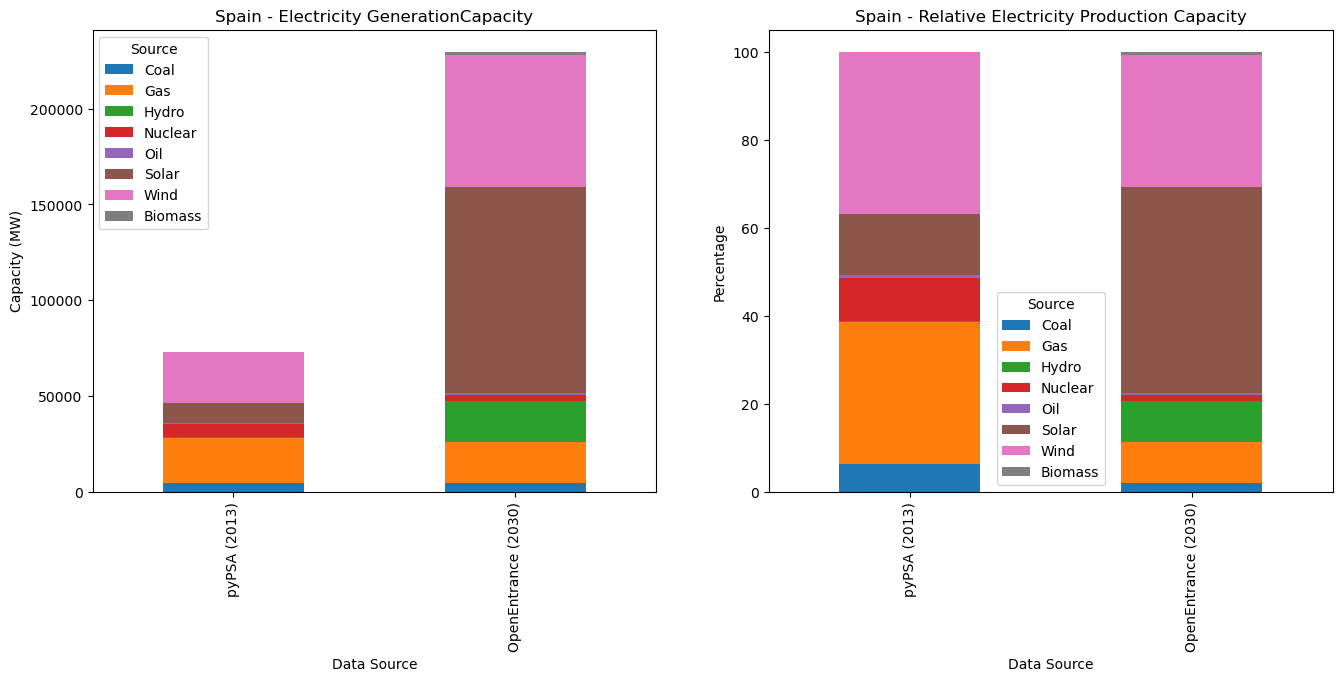

In [19]:
# Plot the data in stacked charts
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Have the legend go in the same order as the bars
#merged = merged.sort_values(by=index, axis=1, ascending=True)

merged.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Spain - Electricity GenerationCapacity')
ax[0].set_ylabel('Capacity (MW)')
ax[0].set_xlabel('Data Source')

merged_percentage.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Spain - Relative Electricity Production Capacity')
ax[1].set_ylabel('Percentage')
ax[1].set_xlabel('Data Source')

plt.show()


In [20]:
# Now, can we do this for the entire european market?

y = pypsa.Network('../networks/elec_s_1024.nc')

INFO:pypsa.io:Imported network elec_s_1024.nc has buses, carriers, generators, lines, links, loads, storage_units


In [21]:
p_EU_aggr = y.generators.groupby('carrier')['p_nom'].sum()

In [22]:
o_Cap_El = o[o['Variable'].str.contains('Capacity\|Electricity', case=False, na=False)].copy()
o_Cap_El['Region'].unique()

array(['BigFrance', 'Portugal', 'Spain'], dtype=object)